In [ ]:
#importing libraries
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data
data = np.genfromtxt('/content/drive/MyDrive/Py/diabetes.data.txt', dtype = np.float64)
print(data)
print(' ')
print('The data type of the loaded files is: ', type(data))

[[     nan      nan      nan ...      nan      nan      nan]
 [ 59.       2.      32.1    ...   4.8598  87.     151.    ]
 [ 48.       1.      21.6    ...   3.8918  69.      75.    ]
 ...
 [ 60.       2.      24.9    ...   4.1271  95.     132.    ]
 [ 36.       1.      30.     ...   5.1299  85.     220.    ]
 [ 36.       1.      19.6    ...   4.5951  92.      57.    ]]
 
The data type of the loaded files is:  <class 'numpy.ndarray'>


In [ ]:
#Changing dataset from "numpy.ndarray" to begin scrubbing the data
df = pd.DataFrame(data, columns= ['Age','Sex','Bmi','Bp','S1','S2','S3','S4','S5',
                                  'S6','Regression'])
print(df)
print('The new data tpye is : ', type(df))

      Age  Sex   Bmi      Bp     S1     S2    S3    S4      S5     S6  \
0     NaN  NaN   NaN     NaN    NaN    NaN   NaN   NaN     NaN    NaN   
1    59.0  2.0  32.1  101.00  157.0   93.2  38.0  4.00  4.8598   87.0   
2    48.0  1.0  21.6   87.00  183.0  103.2  70.0  3.00  3.8918   69.0   
3    72.0  2.0  30.5   93.00  156.0   93.6  41.0  4.00  4.6728   85.0   
4    24.0  1.0  25.3   84.00  198.0  131.4  40.0  5.00  4.8903   89.0   
..    ...  ...   ...     ...    ...    ...   ...   ...     ...    ...   
438  60.0  2.0  28.2  112.00  185.0  113.8  42.0  4.00  4.9836   93.0   
439  47.0  2.0  24.9   75.00  225.0  166.0  42.0  5.00  4.4427  102.0   
440  60.0  2.0  24.9   99.67  162.0  106.6  43.0  3.77  4.1271   95.0   
441  36.0  1.0  30.0   95.00  201.0  125.2  42.0  4.79  5.1299   85.0   
442  36.0  1.0  19.6   71.00  250.0  133.2  97.0  3.00  4.5951   92.0   

     Regression  
0           NaN  
1         151.0  
2          75.0  
3         141.0  
4         206.0  
..          ...

In [ ]:
#Changing datatype genereated NaN values and add an additional row
#droping NaN and additional row
df = df.drop(0)

In [ ]:
def nulls_by_row(df):
# Calculate the number of percent of null values in each row.
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1)/df.shape[1]*100
    rows_missing = pd.DataFrame({'num_cols_missing': num_cols_missing, 'pct_cols_missing': pct_cols_missing}).reset_index().groupby(['num_cols_missing','pct_cols_missing']).count().rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [ ]:
def nulls_by_col(df):
# Calculate the number and percent of null values in each column.
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing/rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

In [ ]:
def df_summary(df):
# Print information about the data including its shape, datatypes, number of values, 
# number of null values in each row and column, the number of unique rows, etc.
    print('--- Shape: {}'.format(df.shape))
    print('\n--- Info')
    display(df.info())
    print('\n--- Descriptions')
    display(df.describe(include='all'))
    print('\n--- Nulls By Column')
    display(nulls_by_col(df))
    print('\n--- Nulls By Row')
    display(nulls_by_row(df))
    print('\n---Unique Rows')
    display(df.apply(lambda x: x.nunique()))

In [ ]:
df_summary(df)

--- Shape: (442, 11)

--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 1 to 442
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         442 non-null    float64
 1   Sex         442 non-null    float64
 2   Bmi         442 non-null    float64
 3   Bp          442 non-null    float64
 4   S1          442 non-null    float64
 5   S2          442 non-null    float64
 6   S3          442 non-null    float64
 7   S4          442 non-null    float64
 8   S5          442 non-null    float64
 9   S6          442 non-null    float64
 10  Regression  442 non-null    float64
dtypes: float64(11)
memory usage: 41.4 KB


None


--- Descriptions


,Age,Sex,Bmi,Bp,S1,S2,S3,S4,S5,S6,Regression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000



--- Nulls By Column


,num_rows_missing,pct_rows_missing
Age,0,0.0
Sex,0,0.0
Bmi,0,0.0
Bp,0,0.0
S1,0,0.0
S2,0,0.0
S3,0,0.0
S4,0,0.0
S5,0,0.0
S6,0,0.0



--- Nulls By Row


,num_cols_missing,pct_cols_missing,num_rows
0,0,0.0,442



---Unique Rows


Age            58
Sex             2
Bmi           163
Bp            100
S1            141
S2            302
S3             63
S4             66
S5            184
S6             56
Regression    214
dtype: int64

In [ ]:
print('Total duplicates found: ', df.duplicated().sum())

Total duplicates found:  0


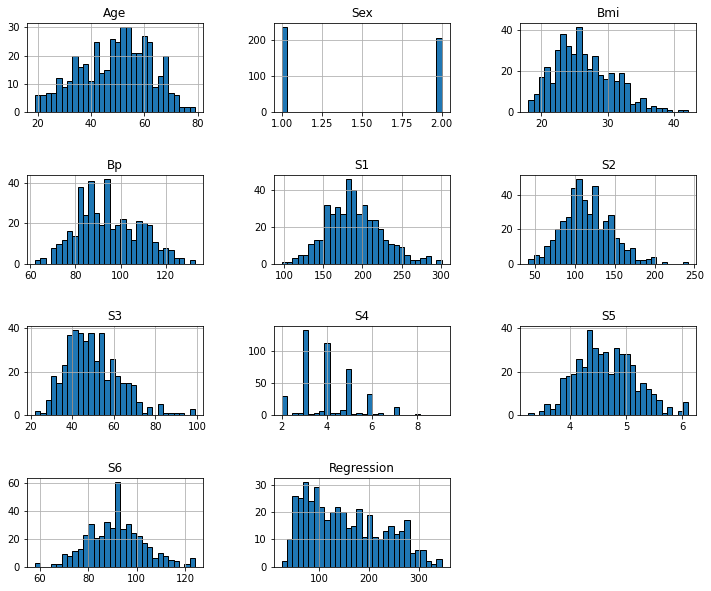

In [ ]:
df.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

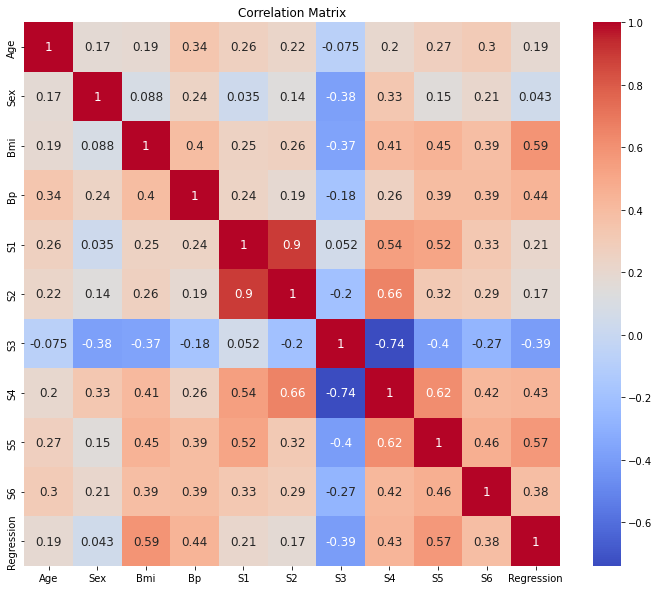

In [ ]:
# create a larger figure
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", ax=ax, annot_kws={"fontsize":12})
ax.set_title("Correlation Matrix")
plt.show()

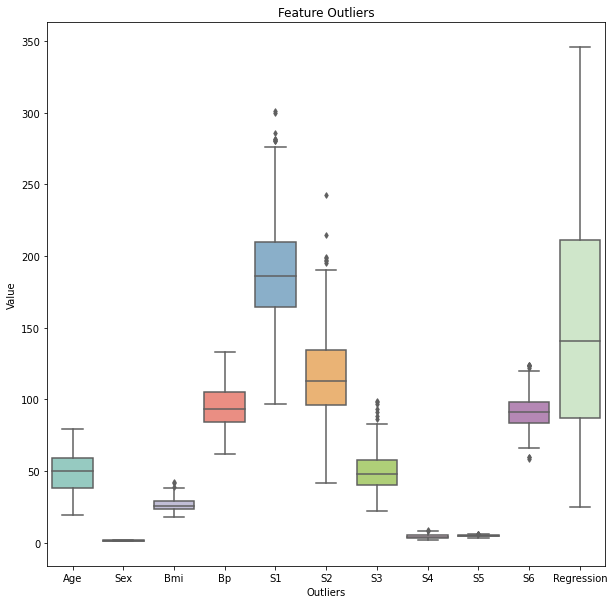

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[['Age','Sex','Bmi','Bp','S1','S2','S3','S4','S5','S6','Regression']], 
            palette='Set3', fliersize=4)

plt.title('Feature Outliers')
plt.xlabel('Outliers')
plt.ylabel('Value')

plt.show()

Text(0, 0.5, 'S5')

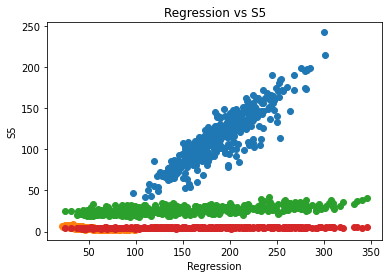

In [ ]:
#shows that the variables s1 and s2 are highly correlated, 0.9
plt.scatter(df['S1'], df['S2'])
plt.title('S1 vs S2')
plt.xlabel('S1')
plt.ylabel('S2')
 
#shows that the variables s3 and s4 are correlated, 0.74
plt.scatter(df['S3'], df['S4'])
plt.title('S3 vs S4')
plt.xlabel('S3')
plt.ylabel('S4')
 
#shows a correlation between regression and bmi, 0.59
plt.scatter(df['Regression'], df['Bmi'])
plt.title('Regression vs Bmi')
plt.xlabel('Regression')
plt.ylabel('Bmi')
 
#shows a correlation between regression and bmi, 0.57
plt.scatter(df['Regression'], df['S5'])
plt.title('Regression vs S5')
plt.xlabel('Regression')
plt.ylabel('S5')

In [ ]:
print(list(df))

['Age', 'Sex', 'Bmi', 'Bp', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Regression']


In [ ]:
df["Sex"].unique()

array([2., 1.])

In [ ]:
df["Sex"] = df["Sex"].astype(np.int8)
df.dtypes

Age           float64
Sex              int8
Bmi           float64
Bp            float64
S1            float64
S2            float64
S3            float64
S4            float64
S5            float64
S6            float64
Regression    float64
dtype: object

In [ ]:
numeric_features = list(df.select_dtypes("float64").columns)
numeric_features.remove('Regression')
categorical_features = list(df.select_dtypes("int8").columns)
target = "target"
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['Age', 'Bmi', 'Bp', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

categorical_features:
['Sex']

target:
target


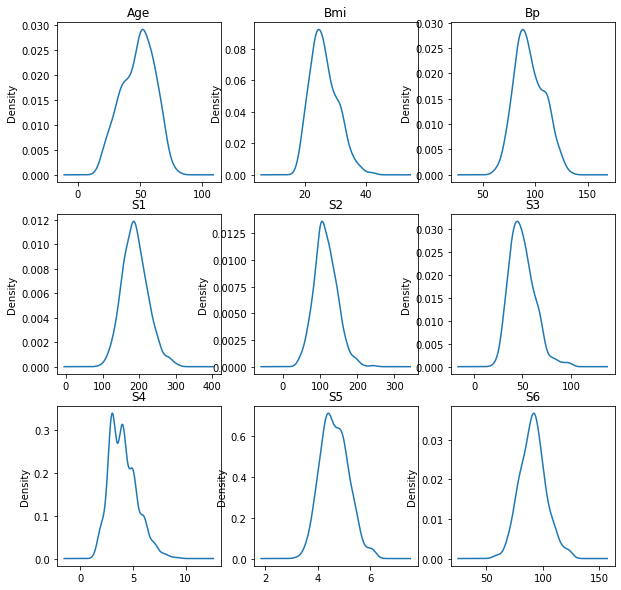

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    df[i].plot(kind="kde",ax=ax[row,col])
    ax[row,col].set_title(i)
    col += 1

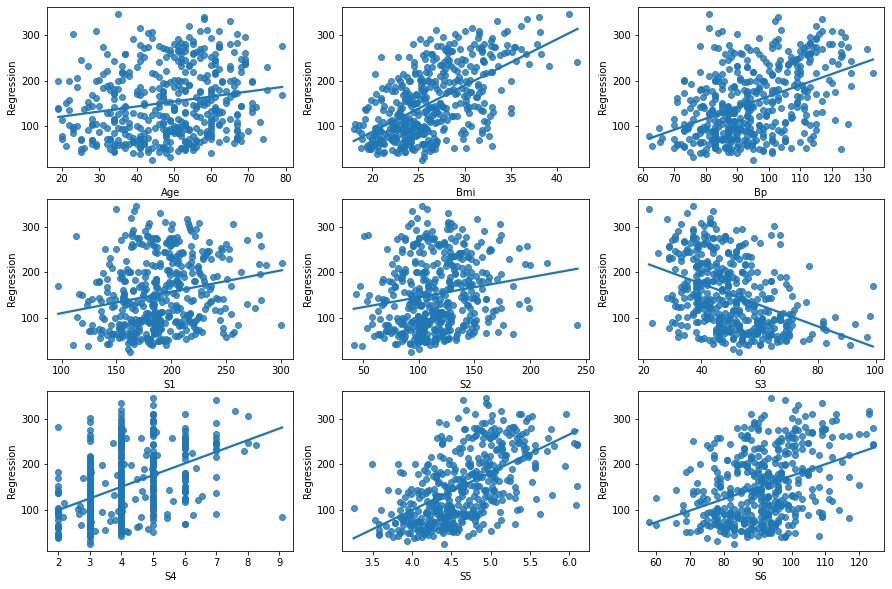

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
row = col = 0
for n,i in enumerate(numeric_features):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.regplot(x=i,y="Regression",data=df,ax=ax[row,col],ci=False)
    col += 1

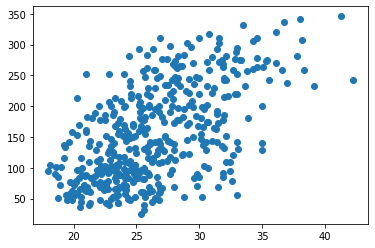

In [ ]:
plt.scatter(df['Bmi'], df['Regression'])

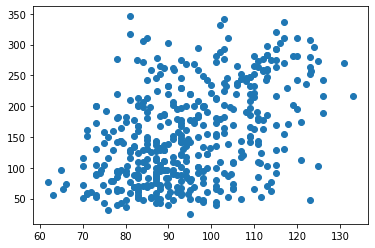

In [ ]:
plt.scatter(df['Bp'], df['Regression'])

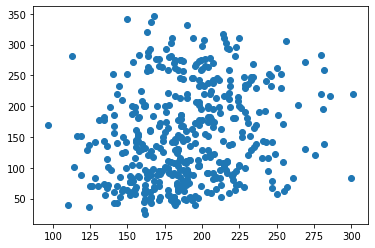

In [ ]:
plt.scatter(df['S1'], df['Regression'])

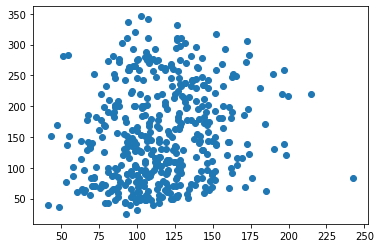

In [ ]:
plt.scatter(df['S2'], df['Regression'])

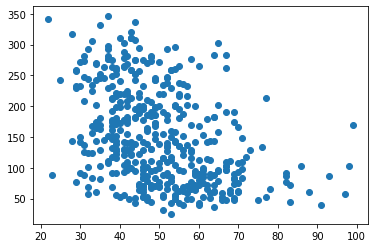

In [ ]:
 plt.scatter(df['S3'], df['Regression'])

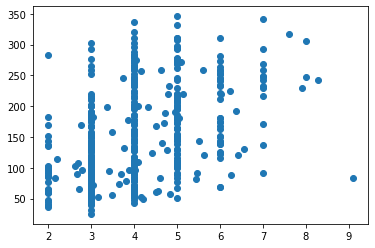

In [ ]:
 plt.scatter(df['S4'], df['Regression'])

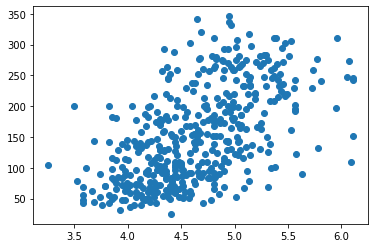

In [ ]:
 plt.scatter(df['S5'], df['Regression'])

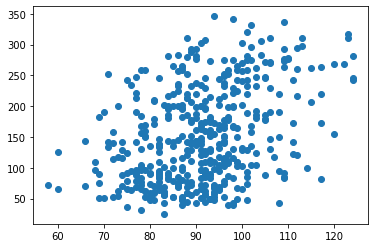

In [ ]:
 plt.scatter(df['S6'], df['Regression'])

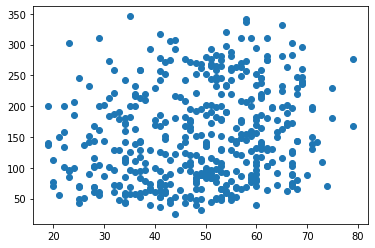

In [ ]:
plt.scatter(df['Age'], df['Regression'])

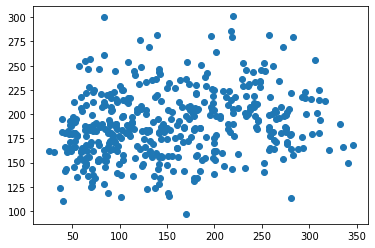

In [ ]:
plt.scatter(df['Regression'], df['S1'])

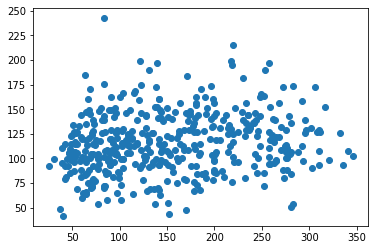

In [ ]:
plt.scatter(df['Regression'], df['S2'])

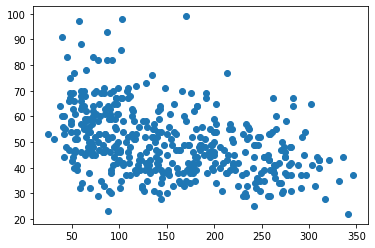

In [ ]:
plt.scatter(df['Regression'], df['S3'])

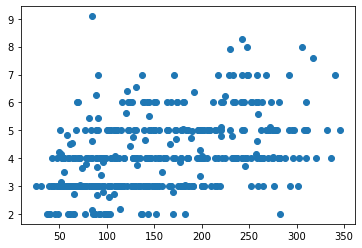

In [ ]:
plt.scatter(df['Regression'], df['S4'])

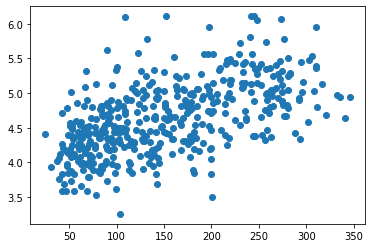

In [ ]:
plt.scatter(df['Regression'], df['S5'])

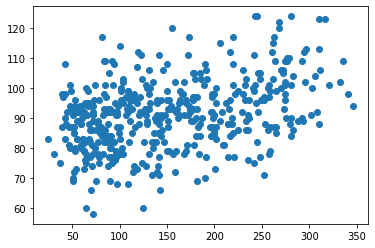

In [ ]:
plt.scatter(df['Regression'], df['S6'])

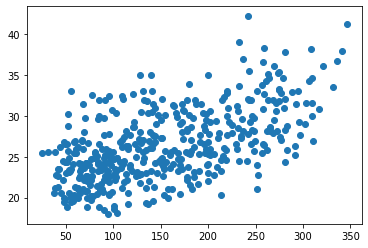

In [ ]:
plt.scatter(df['Regression'], df['Bmi'])

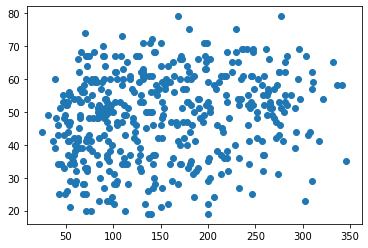

In [ ]:
plt.scatter(df['Regression'], df['Age'])

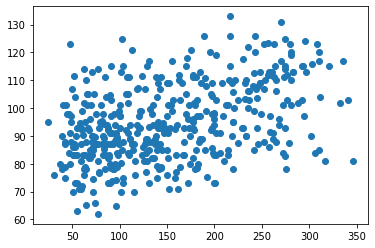

In [ ]:
plt.scatter(df['Regression'], df['Bp'])

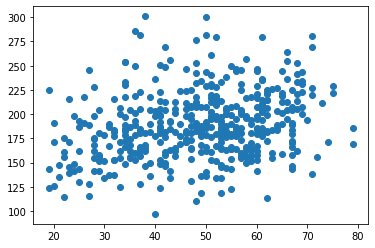

In [ ]:
plt.scatter(df['Age'], df['S1'])

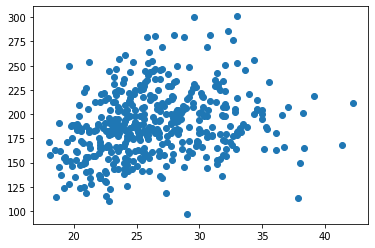

In [ ]:
plt.scatter(df['Bmi'], df['S1'])

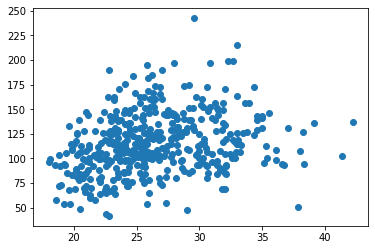

In [ ]:
plt.scatter(df['Bmi'], df['S2'])

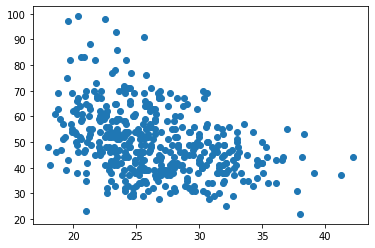

In [ ]:
plt.scatter(df['Bmi'], df['S3'])

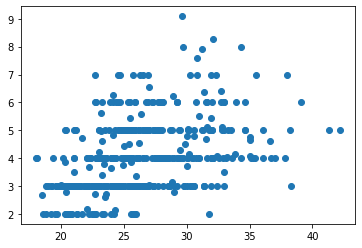

In [ ]:
plt.scatter(df['Bmi'], df['S4'])

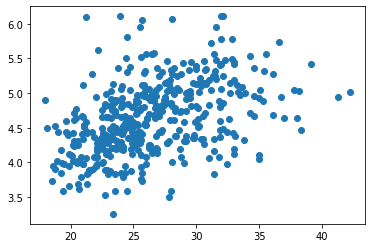

In [ ]:
plt.scatter(df['Bmi'], df['S5'])

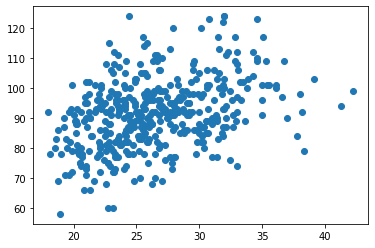

In [ ]:
plt.scatter(df['Bmi'], df['S6'])

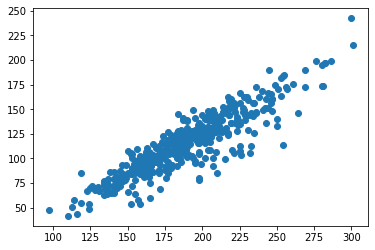

In [ ]:
plt.scatter(df['S1'], df['S2'])

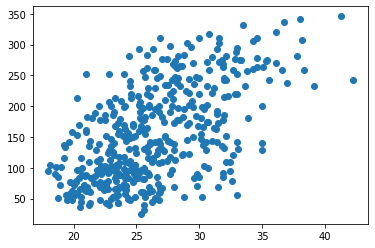

In [ ]:
plt.scatter(df['Bmi'], df['Regression'])

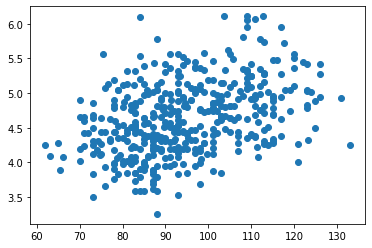

In [ ]:
plt.scatter(df['Bp'], df['S5'])

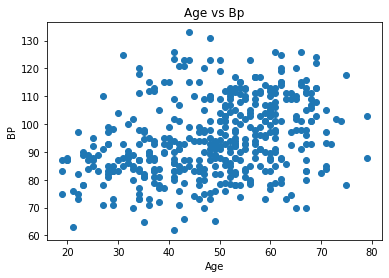

In [ ]:
plt.scatter(df['Age'],df['Bp'])
plt.title('Age vs Bp')
plt.xlabel('Age')
plt.ylabel('BP')
plt.show()

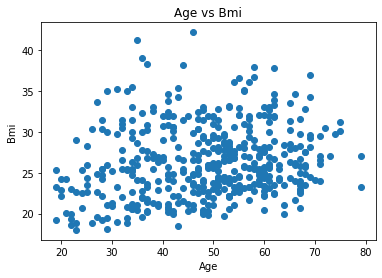

In [ ]:
plt.scatter(df['Age'],df['Bmi'])
plt.title('Age vs Bmi')
plt.xlabel('Age')
plt.ylabel('Bmi')
plt.show()

<AxesSubplot:>

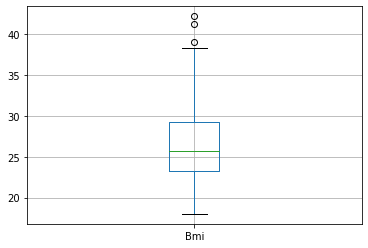

In [ ]:
df[['Bmi']].boxplot()

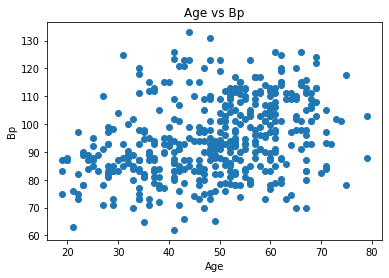

In [ ]:
#scatter plot of Age vs BP
plt.scatter(df["Age"], df["Bp"])
plt.title('Age vs Bp')
plt.xlabel('Age')
plt.ylabel('Bp')
plt.show()